In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./Air_Traffic_Passenger_Statistics.csv')

In [3]:
raw_data.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [4]:
raw_data.shape

(15007, 16)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

# Data Preprocessing

In [6]:
data = raw_data.copy(deep=True)

In [7]:
data.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [8]:
data.columns = data.columns.str.replace(' ', '_')

In [9]:
data['GEO_Region'].value_counts()

US                     5797
Asia                   3273
Europe                 2089
Canada                 1418
Mexico                 1115
Australia / Oceania     737
Central America         274
Middle East             214
South America            90
Name: GEO_Region, dtype: int64

In [10]:
objcols = data.select_dtypes(include='object').columns

In [11]:
data.nunique()

Activity_Period                  129
Operating_Airline                 77
Operating_Airline_IATA_Code       73
Published_Airline                 68
Published_Airline_IATA_Code       64
GEO_Summary                        2
GEO_Region                         9
Activity_Type_Code                 3
Price_Category_Code                2
Terminal                           5
Boarding_Area                      8
Passenger_Count                11699
Adjusted_Activity_Type_Code        3
Adjusted_Passenger_Count       11702
Year                              12
Month                             12
dtype: int64

In [12]:
data.isnull().sum()

Activity_Period                 0
Operating_Airline               0
Operating_Airline_IATA_Code    54
Published_Airline               0
Published_Airline_IATA_Code    54
GEO_Summary                     0
GEO_Region                      0
Activity_Type_Code              0
Price_Category_Code             0
Terminal                        0
Boarding_Area                   0
Passenger_Count                 0
Adjusted_Activity_Type_Code     0
Adjusted_Passenger_Count        0
Year                            0
Month                           0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count', 'Adjusted_Activity_Type_Code',
       'Adjusted_Passenger_Count', 'Year', 'Month'],
      dtype='object')

In [15]:
cols = ['GEO_Summary', 'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
        'Boarding_Area', 'Adjusted_Activity_Type_Code', 'Year', 'Month']

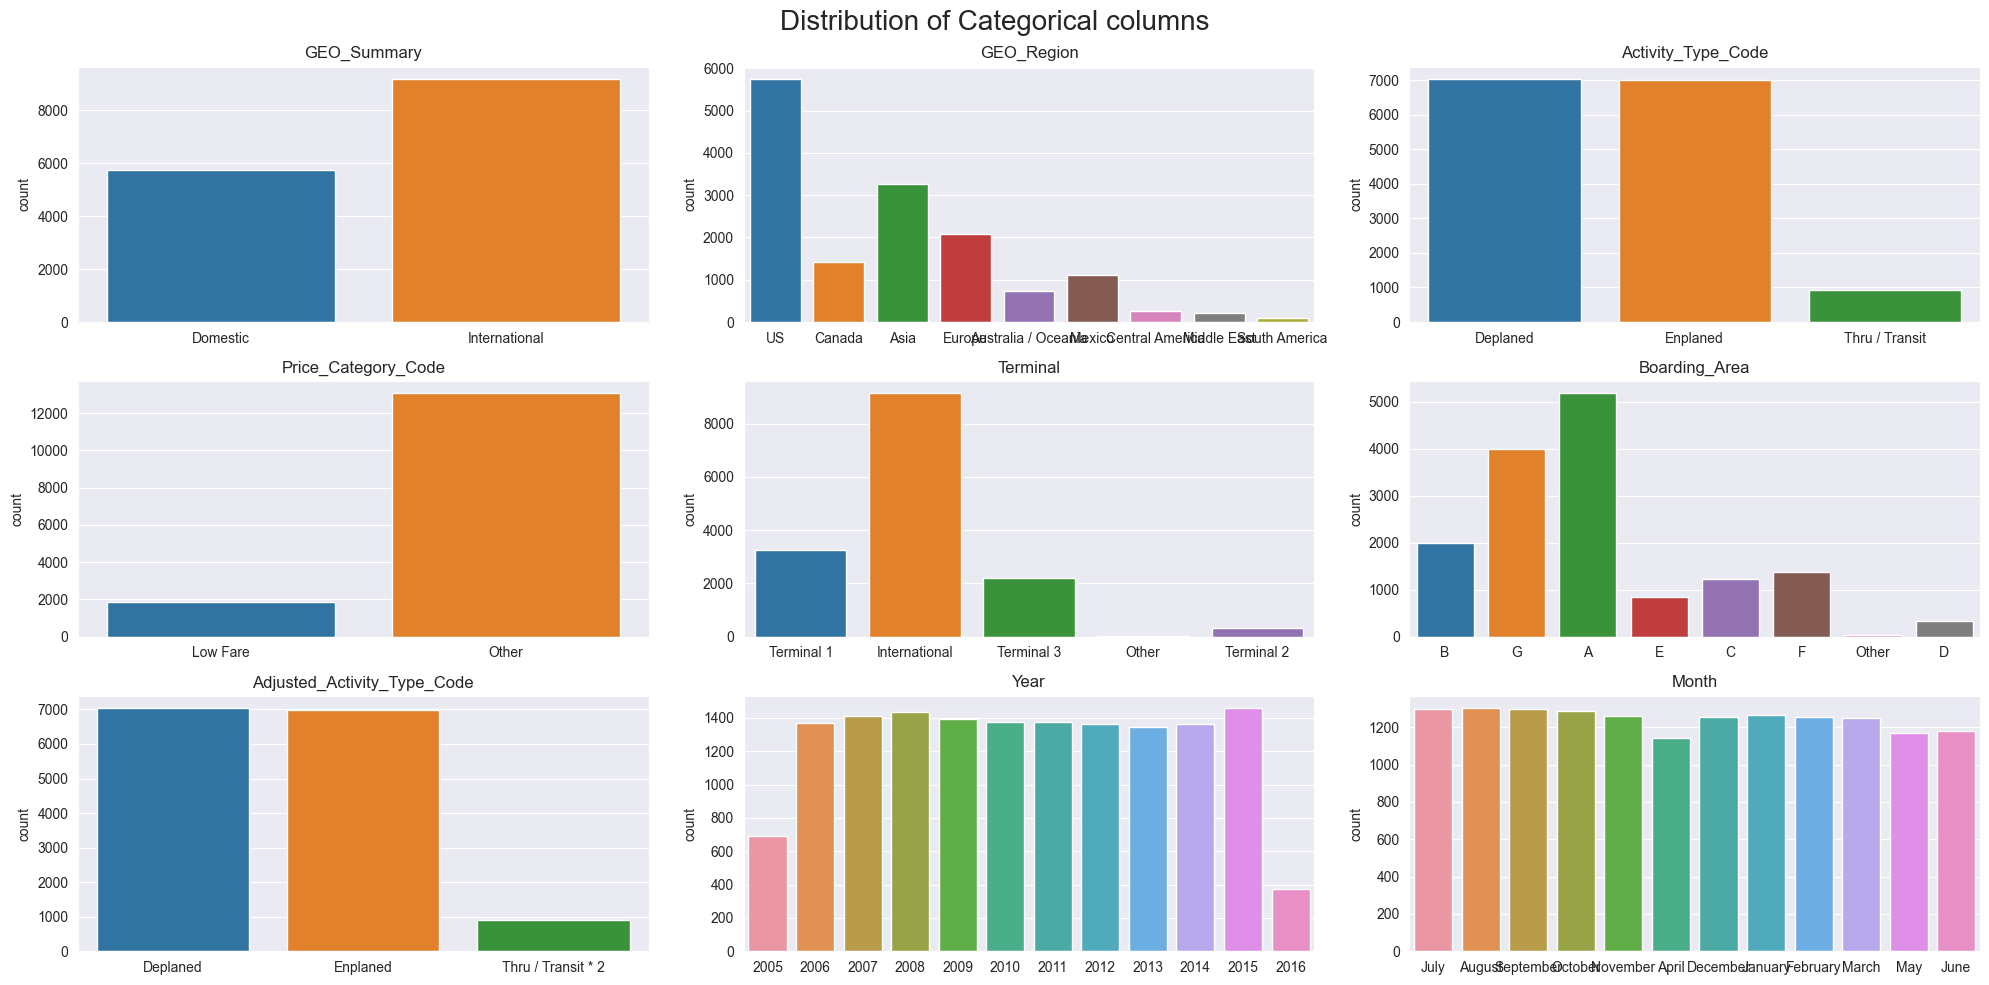

In [16]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
axes = axes.flat

for index, column in enumerate(data[cols]):
    sns.countplot(
        data=data,
        x=column,
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(column)

fig.suptitle('Distribution of Categorical columns', size=20)
fig.tight_layout()


In [17]:
fig = px.pie(data_frame=data, names='GEO_Summary', values='GEO_Summary')
fig.show()


In [18]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data[objcols] = encoder.fit_transform(data[objcols].values)

<AxesSubplot: >

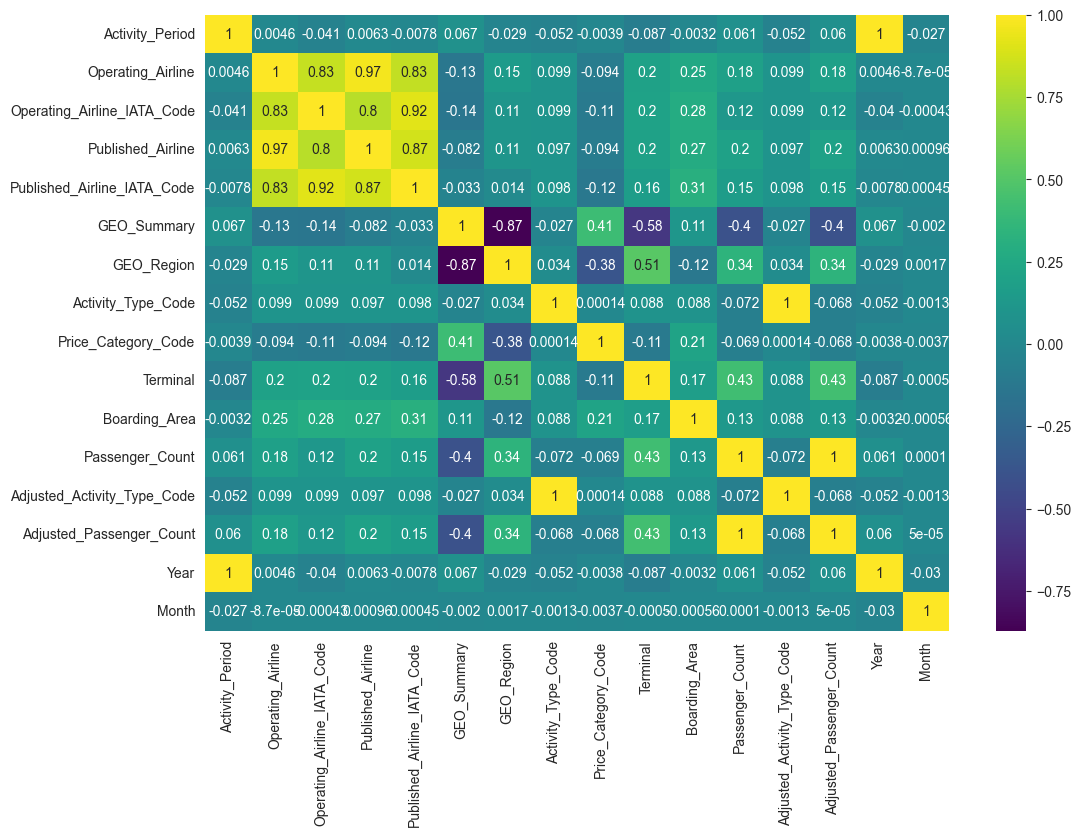

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [20]:
data.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count', 'Adjusted_Activity_Type_Code',
       'Adjusted_Passenger_Count', 'Year', 'Month'],
      dtype='object')

In [21]:
data = data.drop(
        columns=['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
        'Published_Airline', 'Published_Airline_IATA_Code', 'Adjusted_Activity_Type_Code']
        )

In [22]:
from sklearn.cluster import KMeans

wcss = []
k_range = range(1, 7)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

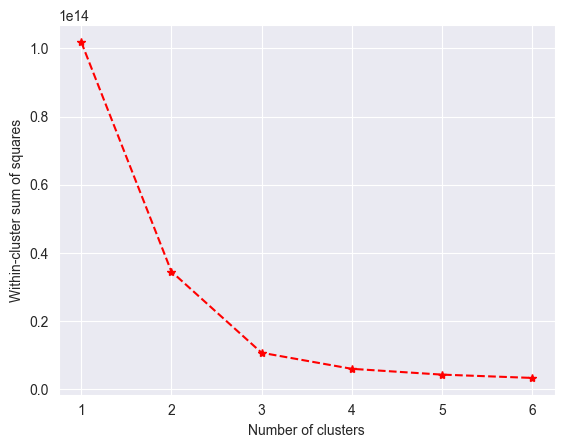

In [23]:
# Plot the WCSS versus the number of clusters
plt.plot(k_range, wcss, '*--', c='red')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [24]:
# Create a KMeans object with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
# Fit the model to the scaled data
kmeans.fit(data)

# Get the cluster labels
labels = kmeans.labels_

# Add the labels to the original dataframe
data['cluster'] = labels

# Print the first 5 rows of the original dataframe with the added cluster labels
data.head()

,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Passenger_Count,Year,Month,cluster
0,0.0,8.0,0.0,0.0,2.0,1.0,27271,27271,2005,5.0,0
1,0.0,8.0,1.0,0.0,2.0,1.0,29131,29131,2005,5.0,0
2,0.0,8.0,2.0,0.0,2.0,1.0,5415,10830,2005,5.0,0
3,1.0,2.0,0.0,1.0,2.0,1.0,35156,35156,2005,5.0,0
4,1.0,2.0,1.0,1.0,2.0,1.0,34090,34090,2005,5.0,0


In [25]:
# Evaluate the model
from sklearn import metrics

# Calculate the silhouette score
silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')
print("Silhouette Score: ", silhouette_score)

Silhouette Score:  0.8235215067380488


In [26]:
# Splitting the dataset into target and features
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [27]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.20,stratify=y)

In [28]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (11962, 9)
xtest shape:  (2991, 9)
ytrain shape:  (11962,)
ytest shape:  (2991,)


In [29]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
print(f'Accuracy:{ac}\n {cm} \n{cr}')

Accuracy:1.0
 [[2595    0    0]
 [   0   61    0]
 [   0    0  335]] 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2595
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00       335

    accuracy                           1.00      2991
   macro avg       1.00      1.00      1.00      2991
weighted avg       1.00      1.00      1.00      2991

